In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from semopy import Model
import semopy
import oulad_helper
from IPython.display import Image

In [4]:
from tqdm import tqdm
import pandas as pd
from os.path import join
from IPython.display import Image
import math
import seaborn as sns
from scipy import stats
import numpy as np
import random
from collections import defaultdict
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.metrics import f1_score
from sklearn import feature_selection
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import statsmodels
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

In [5]:
import sys
import plot_helper_methods
import ml_helper_methods
from gradrev import GradientReversal
import oulad_helper

In [6]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.utils.data as data_utils
from torch.nn import utils
from torch.autograd import Function
import torch.nn.functional as F
from torch.utils.data import DataLoader

import random

random.seed(0)
torch.manual_seed(0)
np.random.seed(0)

In [7]:
data_root='root-directory/'
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
semester_feature_df = pd.read_csv('root-directory/semester-level-activity.csv')
semester_feature_df.set_index('row_id', inplace=True)
semester_feature_df.head(2)

,session_count_dataplus,session_count_dualpane,session_count_externalquiz,session_count_folder,session_count_forumng,session_count_glossary,session_count_homepage,session_count_htmlactivity,session_count_oucollaborate,session_count_oucontent,...,max_block_len,min_block_len,mean_block_len,var_block_len,gender_num,final_result_num,credits,highest_education,previously_attempted,age_num
row_id,,,,,,,,,,,,,,,,,,,,,
79461_CCC_2014B,0,0,0,0,34,0,45,0,0,0,...,3,1,1.500000,0.583333,0,0,90,2,False,1
2356809_BBB_2013J,0,0,0,0,139,2,95,0,3,8,...,11,1,5.333333,14.555556,1,1,60,2,False,0


In [9]:
semester_level_preds = list(set(semester_feature_df.columns).difference(set([
                    'gender_num', 'final_result_num', 'credits', 'highest_education', 
                    'previously_attempted', 'blocks' , 'final_result', 'gender', 'age_num'])))
print(len(semester_level_preds))

65


In [10]:
semester_feature_df.groupby('final_result_num').count()/len(semester_feature_df)

,session_count_dataplus,session_count_dualpane,session_count_externalquiz,session_count_folder,session_count_forumng,session_count_glossary,session_count_homepage,session_count_htmlactivity,session_count_oucollaborate,session_count_oucontent,...,block_count,max_block_len,min_block_len,mean_block_len,var_block_len,gender_num,credits,highest_education,previously_attempted,age_num
final_result_num,,,,,,,,,,,,,,,,,,,,,
0,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,...,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389,0.466389
1,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,...,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611,0.533611


In [11]:
semester_feature_df.groupby('gender_num').count()/len(semester_feature_df)

,session_count_dataplus,session_count_dualpane,session_count_externalquiz,session_count_folder,session_count_forumng,session_count_glossary,session_count_homepage,session_count_htmlactivity,session_count_oucollaborate,session_count_oucontent,...,block_count,max_block_len,min_block_len,mean_block_len,var_block_len,final_result_num,credits,highest_education,previously_attempted,age_num
gender_num,,,,,,,,,,,,,,,,,,,,,
0,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,...,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768,0.529768
1,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,...,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232,0.470232


### How do **unsupervised** (from factor analysis) high-level features correlate with each other?

[0.25114703 0.35702109 0.41023842 0.46021077 0.50766085 0.55014921
 0.59018474 0.62835114 0.66578944 0.69742985 0.72475027 0.74735004
 0.76611063 0.78240239 0.79769898 0.8126166  0.826833   0.84020676
 0.85315377 0.86451012]


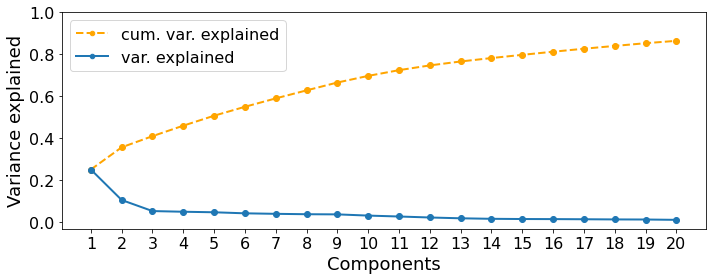

In [42]:
n_comp=20
pca = PCA(n_components=n_comp).fit(semester_feature_df[semester_level_preds].apply(stats.zscore).values)
print(np.cumsum(pca.explained_variance_ratio_))
plot_helper_methods.plot_scree(n_comp, pca, figsize=(10,4))

In [40]:
from factor_analyzer.factor_analyzer import calculate_kmo,calculate_bartlett_sphericity
'''
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate 
at all using the observed correlation matrix against the identity matrix. 
If the test found statistically insignificant, you should not employ a factor analysis.
'''
chi_square_value,p_value=calculate_bartlett_sphericity(semester_feature_df[semester_level_preds])
print(chi_square_value, p_value)

'''
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model. 
KMO estimates the proportion of variance among all the observed variable. 
Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
Value of KMO less than 0.6 is considered inadequate.
'''

kmo_all,kmo_model = calculate_kmo(semester_feature_df[semester_level_preds])
kmo_model 

2125465.112203255 0.0


0.8828830804302642

In [ ]:
from factor_analyzer import FactorAnalyzer

def clarify_loadings(df, threshold=.3):
    df = df.round(2).T
    for c in df.columns:
        df[c] = np.where((df[c]<threshold)&(df[c]>-threshold), '', df[c])
    return df.round(2)

n_factors=10
fa = FactorAnalyzer(rotation=None, n_factors=n_factors)
fa.fit(semester_feature_df[semester_level_preds].values)
loadings = pd.DataFrame(fa.loadings_.T, columns=semester_level_preds)
loadings=clarify_loadings(loadings, threshold=.4)#.rename(columns=high_level_concepts_name)
loadings

In [ ]:
'''project raw data in the factor space'''
factor_names = ['f_{}'.format(f) for f in range(1, n_factors+1)]
factor_transformed = fa.transform(semester_feature_df[semester_level_preds])
factor_transformed = pd.DataFrame(factor_transformed, columns=factor_names, index=semester_feature_df.index)
# tsne_factor = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=0).fit_transform(factor_transformed.values)

In [ ]:
factor_transformed.corr()

In [ ]:
factor_transformed['gender_num']=semester_feature_df.gender_num
factor_transformed['age_num']=semester_feature_df.age_num
factor_transformed['studied_credits']=semester_feature_df.credits
factor_transformed['previously_attempted']=semester_feature_df.previously_attempted
factor_transformed['highest_education_num']=semester_feature_df.highest_education
factor_transformed['final_result_num']=semester_feature_df.final_result_num
factor_transformed.to_csv(join(data_root,'semester-activity-factor-transformed.csv'))

factor_transformed['tsne-1d'] = tsne_factor[:,0]
factor_transformed['tsne-2d'] = tsne_factor[:,1]

plt.figure(figsize=(12,8))
sns.scatterplot(x="tsne-1d", y="tsne-2d",hue="final_result_num", data=factor_transformed,legend="full")

In [ ]:
plot_helper_methods.plot_corr_matrix(factor_transformed[factor_names+['gender_num','final_result_num']].corr())

##### How the factors contribute in predicting outcome

In [ ]:
outcome_logit = ml_helper_methods.test_logit(data = factor_transformed, predictors = factor_names, label = 'final_result_num')
ml_helper_methods.get_OR(outcome_logit)

In [ ]:
factor_transformed.groupby('final_result_num').final_result_num.count()/len(factor_transformed)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(factor_transformed, predictors = factor_names, label = 'final_result_num')

In [ ]:
factor_transformed.groupby('gender_num').final_result_num.count()/len(factor_transformed)

In [ ]:
gender_logit = ml_helper_methods.test_logit(data = factor_transformed, 
                                            predictors = factor_names, label = 'gender_num')
ml_helper_methods.get_OR(gender_logit)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(factor_transformed, predictors = factor_names, 
                                            label = 'gender_num')

In [ ]:
'''remove factors one by one from gender predictors'''
for f in factor_names:
    print(f)
    ml_helper_methods.test_logit_model_accuracy(factor_transformed, 
                                            predictors = set(factor_names).difference([f]),
                                            label = 'gender_num')

### Extract intermediate features in supervised manner

In [12]:
n_epochs=10

  0%|          | 8/2525 [00:00<00:33, 76.26it/s]

lt_dim: 10
training model with l1=0.1, l2=0.1, ortho=0


  0%|          | 12/2525 [00:00<00:22, 112.67it/s]  

EPOCH 1: domain loss=0.0693, class accuracy= 0.7549, domain accuracy=0.5287, l1 loss:303.551


  0%|          | 11/2525 [00:00<00:23, 107.90it/s]  

EPOCH 2: domain loss=0.0691, class accuracy= 0.8138, domain accuracy=0.5298, l1 loss:152.593


  0%|          | 11/2525 [00:00<00:23, 108.79it/s]  

EPOCH 3: domain loss=0.0692, class accuracy= 0.8269, domain accuracy=0.5298, l1 loss:177.201


  0%|          | 11/2525 [00:00<00:23, 108.87it/s]  

EPOCH 4: domain loss=0.0692, class accuracy= 0.8318, domain accuracy=0.5298, l1 loss:185.576


  0%|          | 11/2525 [00:00<00:23, 108.86it/s]  

EPOCH 5: domain loss=0.0692, class accuracy= 0.8349, domain accuracy=0.5298, l1 loss:190.127


  0%|          | 11/2525 [00:00<00:23, 108.32it/s]  

EPOCH 6: domain loss=0.0692, class accuracy= 0.8340, domain accuracy=0.5298, l1 loss:192.353


  0%|          | 11/2525 [00:00<00:23, 108.27it/s]  

EPOCH 7: domain loss=0.0692, class accuracy= 0.8337, domain accuracy=0.5298, l1 loss:192.625


  0%|          | 11/2525 [00:00<00:23, 107.55it/s]  

EPOCH 8: domain loss=0.0692, class accuracy= 0.8334, domain accuracy=0.5298, l1 loss:193.728


  0%|          | 11/2525 [00:00<00:23, 108.28it/s]  

EPOCH 9: domain loss=0.0692, class accuracy= 0.8336, domain accuracy=0.5298, l1 loss:194.820


EPOCH 10: domain loss=0.0692, class accuracy= 0.8334, domain accuracy=0.5298, l1 loss:194.751


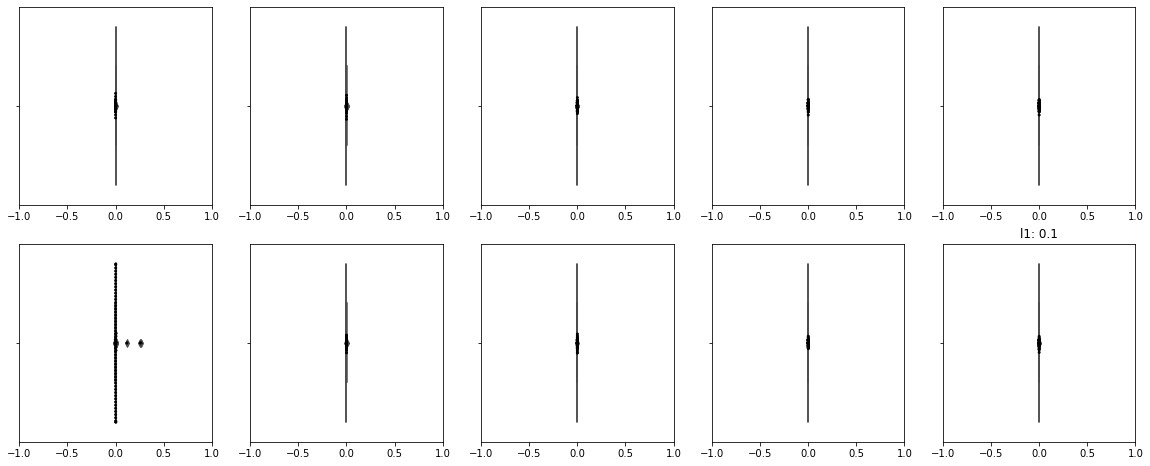

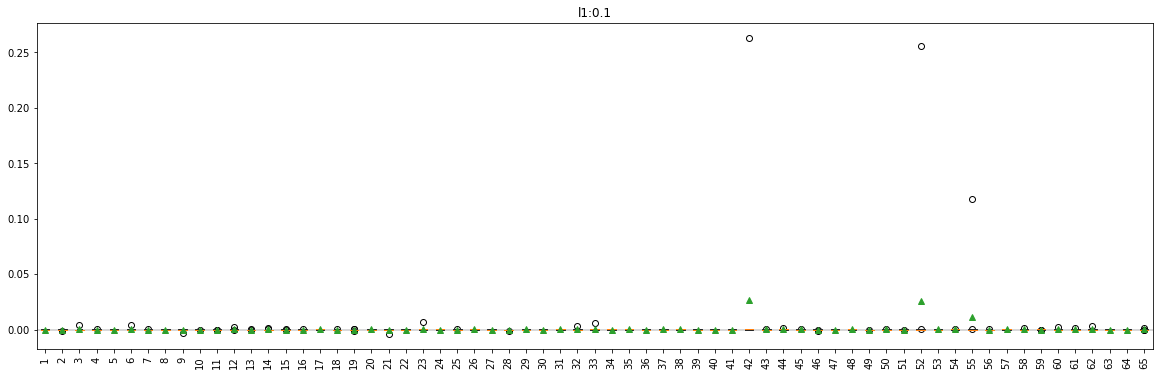

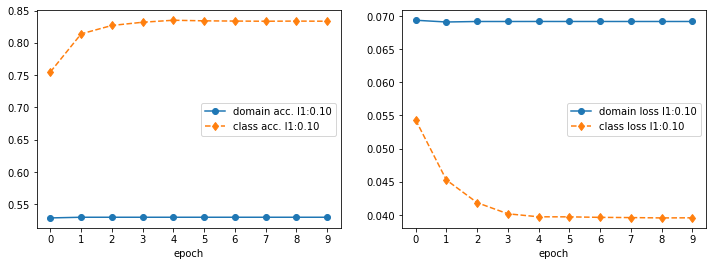

In [13]:
l1_l2_model = oulad_helper.train_model(l1_weight = .1, l2_weight = 0.1, ortho_weight=0, lasso=True,
                                       n_epochs=10, df=semester_feature_df, predictors=semester_level_preds, 
                                       outcome='final_result_num', sensitive_attr='gender_num',
                                       show_plots=True)

In [ ]:
'''get linear transformation of the features'''
transformd_feats = l1_l2_model.lt(torch.Tensor(semester_feature_df[semester_level_preds].values))
transformed_feat_df =  pd.DataFrame(transformd_feats.detach().numpy(), 
                                    columns=trans_columns,
                                    index =semester_feature_df.index)
transformed_feat_df['gender_num']=semester_feature_df.gender_num
transformed_feat_df['final_result_num']=semester_feature_df.final_result_num
# transformed_feat_df.head(1)
plot_helper_methods.plot_corr_matrix(transformed_feat_df[trans_columns+['gender_num','final_result_num']].corr())

In [15]:
'''find featuers that has mostly zero weights and remove them'''
thresh = 1e-3
clamped_params = list(l1_l2_model.lt.parameters())[0].abs().clamp(min=thresh) - thresh
clamped_params = clamped_params.detach().numpy().T

non_zero_preds =[]
for p in range(len(clamped_params)):
    if np.count_nonzero(clamped_params[p])>0:
        non_zero_preds.append(semester_level_preds[p])
print('non zero predictors:',len(non_zero_preds))#, non_zero_preds
non_zero_preds

non zero predictors: 19


['sum_click_resource',
 'session_count_subpage',
 'perc_interacted_homepage',
 'session_count_quiz',
 'sum_click_homepage',
 'session_count_forumng',
 'sum_click_forumng',
 'perc_interacted_glossary',
 'perc_interacted_externalquiz',
 'sum_click_oucontent',
 'sum_click_subpage',
 'session_count_homepage',
 'perc_interacted_subpage',
 'perc_interacted_quiz',
 'perc_interacted_oucontent',
 'sum_click_glossary',
 'perc_interacted_oucollaborate',
 'perc_interacted_resource',
 'session_count_oucontent']

In [16]:
'''Train a model only with the non-zero predictors'''
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, predictors = non_zero_preds, label = 'final_result_num', max_iter=50000)

        Accuracy:85.36
        Precision:[0.84801073 0.85810811]
        Recall:[0.82621951 0.87649837]
        F1:[0.83697331 0.86720575]


LogisticRegression(C=1, max_iter=50000, penalty='none', random_state=0)

In [17]:
'''How well the outcome can be predicted using all features'''
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, predictors = semester_level_preds, label = 'final_result_num', max_iter=50000)

        Accuracy:87.42
        Precision:[0.87393066 0.87446959]
        Recall:[0.84538328 0.89829277]
        F1:[0.85941997 0.88622111]


LogisticRegression(C=1, max_iter=50000, penalty='none', random_state=0)

In [18]:
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, predictors = non_zero_preds, label = 'gender_num', max_iter=10000)

        Accuracy:68.73
        Precision:[0.66656308 0.72364828]
        Recall:[0.80912863 0.55254379]
        F1:[0.73095928 0.62662568]


LogisticRegression(C=1, max_iter=10000, penalty='none', random_state=0)

In [19]:
'''How well the gender can be predicted using all features'''
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, predictors = semester_level_preds, label = 'gender_num', max_iter=10000)

        Accuracy:72.25
        Precision:[0.69543465 0.76931388]
        Recall:[0.83892871 0.59382819]
        F1:[0.76047188 0.67027536]


LogisticRegression(C=1, max_iter=10000, penalty='none', random_state=0)

##### Repeat training with only the non-zero predictors

  1%|          | 22/2525 [00:00<00:11, 211.83it/s]

lt_dim: 10
training model with l1=1, l2=0.1, ortho=0


  0%|          | 12/2525 [00:00<00:22, 112.03it/s]  

EPOCH 1: domain loss=0.0699, class accuracy= 0.8173, domain accuracy=0.5280, l1 loss:124.171


  0%|          | 11/2525 [00:00<00:23, 108.66it/s]  

EPOCH 2: domain loss=0.0690, class accuracy= 0.8454, domain accuracy=0.5297, l1 loss:108.123


  0%|          | 11/2525 [00:00<00:23, 109.15it/s]  

EPOCH 3: domain loss=0.0691, class accuracy= 0.8462, domain accuracy=0.5298, l1 loss:103.795


  0%|          | 11/2525 [00:00<00:22, 109.62it/s]  

EPOCH 4: domain loss=0.0692, class accuracy= 0.8485, domain accuracy=0.5298, l1 loss:98.813


  0%|          | 11/2525 [00:00<00:23, 105.72it/s]  

EPOCH 5: domain loss=0.0692, class accuracy= 0.8499, domain accuracy=0.5298, l1 loss:96.548


  0%|          | 11/2525 [00:00<00:23, 107.19it/s]  

EPOCH 6: domain loss=0.0692, class accuracy= 0.8485, domain accuracy=0.5298, l1 loss:95.864


  0%|          | 11/2525 [00:00<00:23, 107.37it/s]  

EPOCH 7: domain loss=0.0692, class accuracy= 0.8497, domain accuracy=0.5298, l1 loss:93.329


  0%|          | 11/2525 [00:00<00:23, 107.18it/s]  

EPOCH 8: domain loss=0.0692, class accuracy= 0.8486, domain accuracy=0.5298, l1 loss:88.562


  0%|          | 11/2525 [00:00<00:23, 107.58it/s]  

EPOCH 9: domain loss=0.0692, class accuracy= 0.8489, domain accuracy=0.5298, l1 loss:82.978


  0%|          | 11/2525 [00:00<00:23, 107.46it/s]  

EPOCH 10: domain loss=0.0692, class accuracy= 0.8478, domain accuracy=0.5298, l1 loss:74.283


  0%|          | 11/2525 [00:00<00:24, 104.59it/s]  

EPOCH 11: domain loss=0.0692, class accuracy= 0.8492, domain accuracy=0.5298, l1 loss:57.535


  0%|          | 11/2525 [00:00<00:23, 107.79it/s]  

EPOCH 12: domain loss=0.0692, class accuracy= 0.8492, domain accuracy=0.5298, l1 loss:39.462


  0%|          | 11/2525 [00:00<00:23, 107.89it/s]  

EPOCH 13: domain loss=0.0692, class accuracy= 0.8496, domain accuracy=0.5298, l1 loss:34.857


  0%|          | 11/2525 [00:00<00:23, 106.95it/s]  

EPOCH 14: domain loss=0.0692, class accuracy= 0.8499, domain accuracy=0.5298, l1 loss:34.897


  0%|          | 11/2525 [00:00<00:23, 107.80it/s]  

EPOCH 15: domain loss=0.0692, class accuracy= 0.8491, domain accuracy=0.5298, l1 loss:34.725


  0%|          | 11/2525 [00:00<00:23, 106.58it/s]  

EPOCH 16: domain loss=0.0692, class accuracy= 0.8480, domain accuracy=0.5298, l1 loss:34.794


  0%|          | 11/2525 [00:00<00:23, 107.27it/s]  

EPOCH 17: domain loss=0.0692, class accuracy= 0.8495, domain accuracy=0.5298, l1 loss:34.484


  0%|          | 11/2525 [00:00<00:23, 106.30it/s]  

EPOCH 18: domain loss=0.0692, class accuracy= 0.8485, domain accuracy=0.5298, l1 loss:33.867


  0%|          | 11/2525 [00:00<00:23, 107.16it/s]  

EPOCH 19: domain loss=0.0692, class accuracy= 0.8493, domain accuracy=0.5298, l1 loss:35.088


EPOCH 20: domain loss=0.0692, class accuracy= 0.8490, domain accuracy=0.5298, l1 loss:34.257


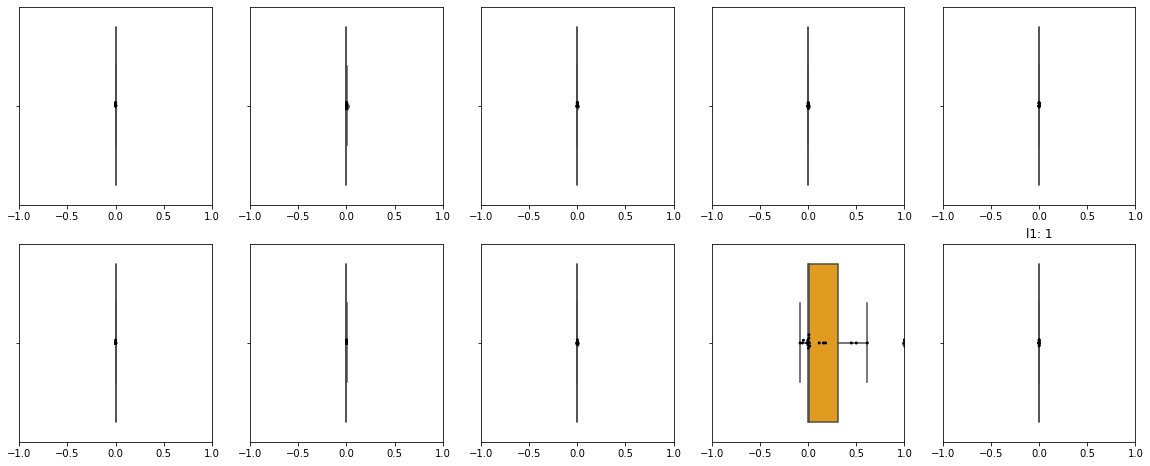

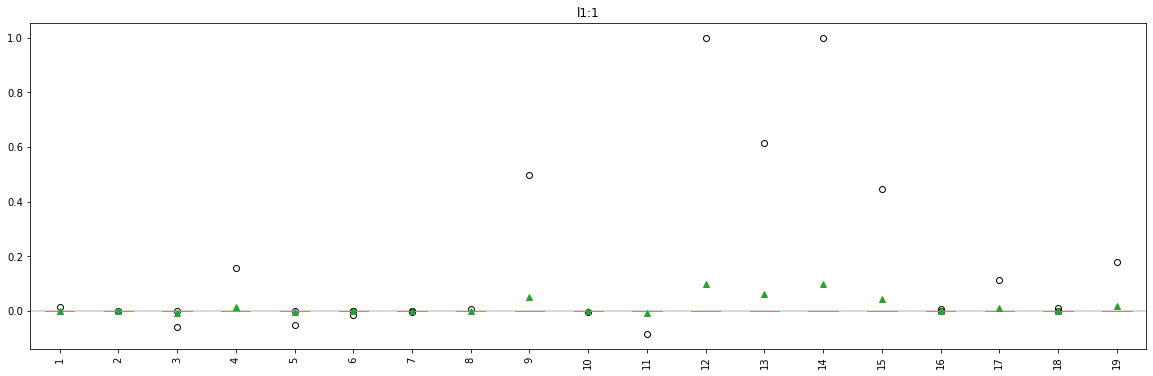

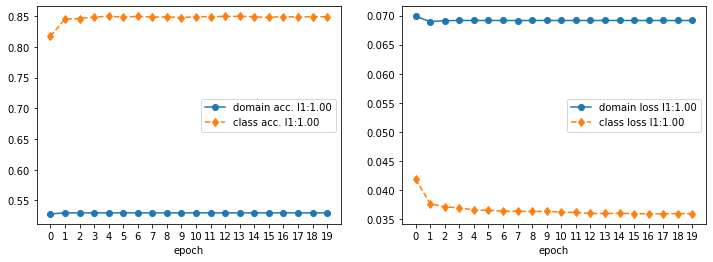

In [20]:
'''train with constrain {0,1}'''
reduced_model = oulad_helper.train_model(lasso=False, l1_weight = 1, l2_weight = 0.1,  n_epochs=15,
                        df=semester_feature_df, predictors=non_zero_preds, 
                        outcome='final_result_num', sensitive_attr='gender_num', show_plots=True)

(-1.2, 1.2)

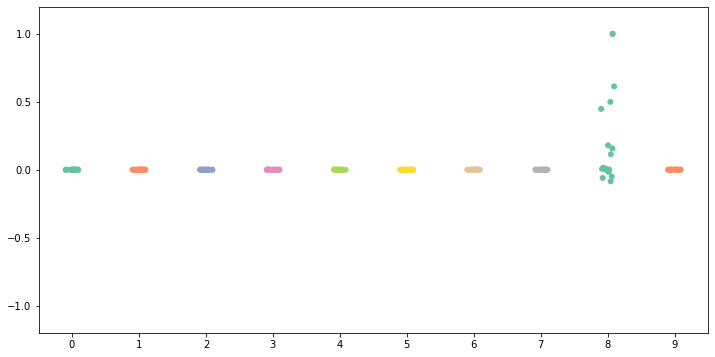

In [21]:
params = list(reduced_model.lt.parameters())[0].detach().numpy()
plt.figure(figsize=(12,6))
sns.stripplot(data=params.T, orient='v', palette="Set2", size=6, edgecolor='black')
plt.ylim([-1.2,1.2])

(-1.2, 1.2)

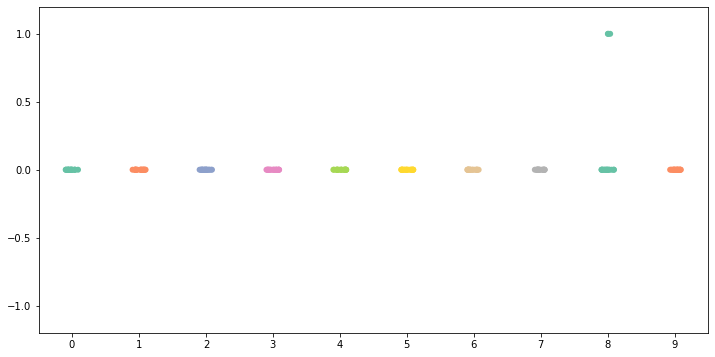

In [22]:
discrete_params = np.zeros(params.shape)
for i in range(params.shape[0]):
    for j in range(params.shape[1]):
        if params[i][j]>.5:
            discrete_params[i][j]= 1
        elif params[i][j]<-.5:
            discrete_params[i][j]= -1
            
plt.figure(figsize=(12,6))
sns.stripplot(data=discrete_params.T, orient='v', palette="Set2", size=6)
plt.ylim([-1.2,1.2])

In [23]:
from collections import Counter
counts = []
for i in range(discrete_params.shape[0]):
    print('node:', i+1)
    for j in range(discrete_params.shape[1]):
        p = discrete_params[i][j]
        if p!=0:
            print('\t{} {}'.format('+' if p>0 else '-', non_zero_preds[j]))
            counts.append(non_zero_preds[j])

print()
print(len(set(counts)))
print((Counter(counts).most_common()))

node: 1
node: 2
node: 3
node: 4
node: 5
node: 6
node: 7
node: 8
node: 9
	+ session_count_homepage
	+ perc_interacted_subpage
	+ perc_interacted_quiz
node: 10

3
[('session_count_homepage', 1), ('perc_interacted_subpage', 1), ('perc_interacted_quiz', 1)]


In [ ]:
final_preds= ['perc_interacted_subpage', 'perc_interacted_oucontent', 'perc_interacted_quiz',
                'session_count_homepage']


In [32]:
std_feats = semester_feature_df[final_preds].apply(stats.zscore)
std_feats['gender_num']=semester_feature_df.gender_num
std_feats['final_result_num']=semester_feature_df.final_result_num

In [33]:
ml_helper_methods.test_logit_model_accuracy(
    std_feats, predictors = final_preds, label = 'final_result_num', max_iter=50000)

ml_helper_methods.test_logit_model_accuracy(
    std_feats, predictors = final_preds, label = 'gender_num', max_iter=50000)

        Accuracy:84.31
        Precision:[0.82497839 0.85850091]
        Recall:[0.83144599 0.85288776]
        F1:[0.82819957 0.85568513]
        Accuracy:63.70
        Precision:[0.62461913 0.6598755 ]
        Recall:[0.7732931  0.48623853]
        F1:[0.69105006 0.55990396]


LogisticRegression(C=1, max_iter=50000, penalty='none', random_state=0)

In [38]:
semester_feature_df['combined_feat'] = semester_feature_df[final_preds].sum(axis=1)
semester_feature_df.head(2)[final_preds+['combined_feat']]

,perc_interacted_subpage,perc_interacted_oucontent,perc_interacted_quiz,session_count_homepage,combined_feat
row_id,,,,,
79461_CCC_2014B,28.571428,0.000000,62.499996,45,136.071424
2356809_BBB_2013J,42.105262,99.999967,99.999980,95,337.105209


In [34]:
std_feats['combined_feat'] = std_feats[final_preds].sum(axis=1)
std_feats.head(2)[final_preds+['combined_feat']]

,perc_interacted_subpage,perc_interacted_oucontent,perc_interacted_quiz,session_count_homepage,combined_feat
row_id,,,,,
79461_CCC_2014B,-0.306942,-1.395830,0.466967,-0.283859,-1.519664
2356809_BBB_2013J,0.317316,1.763831,1.420956,0.670864,4.172966


In [39]:
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, predictors = ['combined_feat'], label = 'final_result_num', max_iter=50000)

ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, predictors = ['combined_feat'], label = 'gender_num', max_iter=50000)

        Accuracy:83.50
        Precision:[0.81652964 0.85062089]
        Recall:[0.82186411 0.8459862 ]
        F1:[0.81918819 0.84829721]
        Accuracy:51.32
        Precision:[0.52031151 0.39932886]
        Recall:[0.93247831 0.04962469]
        F1:[0.66792759 0.08827893]


LogisticRegression(C=1, max_iter=50000, penalty='none', random_state=0)

In [35]:
ml_helper_methods.test_logit_model_accuracy(
    std_feats, predictors = ['combined_feat'], label = 'final_result_num', max_iter=50000)

ml_helper_methods.test_logit_model_accuracy(
    std_feats, predictors = ['combined_feat'], label = 'gender_num', max_iter=50000)

        Accuracy:83.20
        Precision:[0.81643357 0.8449837 ]
        Recall:[0.81358885 0.84743916]
        F1:[0.81500873 0.84620965]
        Accuracy:51.24
        Precision:[0.52106084 0.4430605 ]
        Recall:[0.88193135 0.10383653]
        F1:[0.65508546 0.16824324]


LogisticRegression(C=1, max_iter=50000, penalty='none', random_state=0)

In [37]:
ml_helper_methods.get_OR(ml_helper_methods.get_logit_model(
                        data=std_feats,
                        predictors= final_preds,
                        label='final_result_num',
                        l1_lambda=.00000))

,,coef,std err,z,P>|z|,[0.025,0.975],OR,_[0.025,0.975]_
0,const,0.3809,0.019,19.740,0.0,0.343,0.419,1.463601,1.409169,1.520440
1,perc_interacted_subpage,0.4396,0.024,18.630,0.0,0.393,0.486,1.552086,1.481418,1.625800
2,perc_interacted_oucontent,0.5670,0.021,26.718,0.0,0.525,0.609,1.762970,1.690459,1.838592
3,perc_interacted_quiz,1.1061,0.021,53.186,0.0,1.065,1.147,3.022547,2.900839,3.148733
4,session_count_homepage,1.1816,0.032,36.906,0.0,1.119,1.244,3.259585,3.061791,3.469464


In [ ]:
non_zero_preds2 = [non_zero_preds[i-1] for i in [1, 4, 5, 10, 11, 13, 14, 15, 18]]
non_zero_preds2#, oulad_helper.activity_name_dict['ouelluminate'], oulad_helper.activity_name_dict['oucontent']

In [ ]:
disc_cols =['d_{}'.format(i) for i in range(1,11)]
discrete_transform_df = np.matmul(semester_feature_df[non_zero_preds].values, discrete_params.T)
discrete_transform_df = pd.DataFrame(discrete_transform_df, columns =disc_cols, 
                                     index=semester_feature_df.index)
discrete_transform_df['gender_num']=semester_feature_df.gender_num
discrete_transform_df['final_result_num']=semester_feature_df.final_result_num
discrete_transform_df.head(2)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    discrete_transform_df, 
    predictors = disc_cols, label = 'final_result_num', max_iter=10000)
ml_helper_methods.get_OR(ml_helper_methods.get_logit_model(
                        data=discrete_transform_df,
                        predictors=disc_cols,
                        label='final_result_num',
                        l1_lambda=.00000))

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    discrete_transform_df, 
    predictors = disc_cols, label = 'gender_num', max_iter=10000)

ml_helper_methods.get_OR(ml_helper_methods.get_logit_model(
                        data=discrete_transform_df,
                        predictors=disc_cols,
                        label='gender_num',
                        l1_lambda=.00000))

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    discrete_transform_df, 
    predictors = ['d_3', 'd_4', 'd_8', 'd_10'], label = 'final_result_num', max_iter=10000)

ml_helper_methods.test_logit_model_accuracy(
    discrete_transform_df, 
    predictors = ['d_3', 'd_4', 'd_8', 'd_10'], label = 'gender_num', max_iter=10000)

In [ ]:
'''get linear transformation of the features'''
transformd_feats = reduced_model.lt(torch.Tensor(semester_feature_df[non_zero_preds].values))
transformed_feat_df =  pd.DataFrame(transformd_feats.detach().numpy(), 
                                    columns=trans_columns,
                                    index =semester_feature_df.index)
transformed_feat_df['gender_num']=semester_feature_df.gender_num
transformed_feat_df['final_result_num']=semester_feature_df.final_result_num
transformed_feat_df.head(1)

In [ ]:
thresh=1e-3
clamped_params = list(reduced_model.lt.parameters())[0].abs().clamp(min=thresh) - thresh
clamped_params = clamped_params.detach().numpy().T

non_zero_preds2 =[]
for p in range(len(clamped_params)):
    if np.count_nonzero(clamped_params[p])>0:
        non_zero_preds2.append(semester_level_preds[p])
print('non zero predictors:',len(non_zero_preds2))#, non_zero_preds
non_zero_preds2

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, 
    predictors = non_zero_preds2, label = 'final_result_num', max_iter=10000)
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, 
    predictors = non_zero_preds2, label = 'gender_num', max_iter=10000)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    transformed_feat_df, 
    predictors = ['f_4'], label = 'final_result_num', max_iter=10000)
ml_helper_methods.test_logit_model_accuracy(
    transformed_feat_df, 
    predictors = ['f_4'], label = 'gender_num', max_iter=10000)


In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, 
    predictors = ['perc_interacted_subpage',
	'session_count_homepage',
	'perc_interacted_quiz']
    , label = 'final_result_num', max_iter=10000)
ml_helper_methods.get_OR(ml_helper_methods.get_logit_model(
                        data=transformed_feat_df,
                        predictors=trans_columns,
                        label='gender_num',
                        l1_lambda=.00000))

In [ ]:
predictors = ['f_1', 'f_7']
ml_helper_methods.test_logit_model_accuracy(
    transformed_feat_df, 
    predictors = predictors, label = 'final_result_num', max_iter=10000)
ml_helper_methods.get_OR(ml_helper_methods.get_logit_model(data=transformed_feat_df,
                          predictors=predictors,
                          label='final_result_num'))

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    transformed_feat_df, 
    predictors = predictors, label = 'gender_num', max_iter=10000)
ml_helper_methods.get_OR(ml_helper_methods.test_logit(data=transformed_feat_df,
                          predictors=predictors,
                          label='gender_num'))

In [ ]:
'''find corrlations of raw features with the three linearly transformed features'''
corr_df = pd.DataFrame(index=predictors)
for f in predictors:
    print(f)
    for pred in non_zero_preds:
        r, p = stats.pearsonr(transformed_feat_df[f], semester_feature_df[pred])
        corr_df.loc[f, pred]=r
#         if p<0.05 and np.fabs(r)>.0:
#            print('\t{}: r=  {:.2f}'.format(pred, r))


sns.heatmap(corr_df.T)
plt.show()
corr_df.T.sort_values(predictors, ascending=False)

In [ ]:
preds = [
#     'sum_click_resource',
 'session_count_url',
 'perc_interacted_url',
#  'session_count_forumng',
 'sum_click_homepage',
 'sum_click_subpage',
 'session_count_resource',
#  'perc_interacted_subpage',
#  'session_count_homepage',
 'sum_click_oucontent',
#  'sum_click_url',
 'perc_interacted_quiz',
 'sum_click_forumng',
 'var_block_len']

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, 
    predictors = preds, 
    label = 'final_result_num', max_iter=10000)
ml_helper_methods.test_logit_model_accuracy(
    semester_feature_df, 
    predictors = preds, 
    label = 'gender_num', max_iter=10000)

In [ ]:
list(reduced_model.lt.parameters())[0][4].detach()

In [ ]:
'''Extract factors from the transformed features'''

# n_comp=10
# pca = PCA(n_components=n_comp).fit(transformed_feat_df[trans_columns].values)
# pca.explained_variance_ratio_,np.cumsum(pca.explained_variance_ratio_)
# plot_helper_methods.plot_scree(n_comp, pca, figsize=(10,4))

fa = FactorAnalyzer(rotation='varimax', n_factors=10)
fa.fit(transformed_feat_df[trans_columns])
loadings = pd.DataFrame(fa.loadings_.T, columns=trans_columns)
loadings=clarify_loadings(loadings, threshold=.3)#.rename(columns=high_level_concepts_name)
# loadings

In [ ]:
fa_transformed = fa.transform(transformed_feat_df[trans_columns].values)
fa_transformed_df = pd.DataFrame(fa_transformed, columns=trans_columns, index=transformed_feat_df.index)
fa_transformed_df['gender_num'] = transformed_feat_df.gender_num
fa_transformed_df['final_result_num'] = transformed_feat_df.final_result_num
fa_transformed_df.head(2)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    fa_transformed_df, predictors = trans_columns,
    label = 'final_result_num', max_iter=10000)
ml_helper_methods.get_OR(ml_helper_methods.test_logit(data=fa_transformed_df,
                          predictors=set(trans_columns).difference(['f_10']),
                          label='final_result_num'))

In [ ]:
ml_helper_methods.test_logit_model_accuracy(fa_transformed_df,
                          predictors=['f_3'],
                          label='final_result_num')
print()
ml_helper_methods.test_logit_model_accuracy(fa_transformed_df,
                          predictors=['f_3'],
                          label='gender_num')

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    fa_transformed_df, predictors = trans_columns,
    label = 'gender_num', max_iter=10000)

ml_helper_methods.get_OR(ml_helper_methods.test_logit(data=fa_transformed_df,
                          predictors=set(trans_columns).difference(['f_10']),
                          label='gender_num'))

In [ ]:
for pred in trans_columns:
    r, p = stats.pearsonr(fa_transformed_df.f_3, transformed_feat_df[pred])
    if p<0.05 and np.fabs(r)>.3:
        print('\t{}: r={:.2f}'.format(pred, r))


In [ ]:
for pred in non_zero_preds:
    r, p = stats.pearsonr(fa_transformed_df.f_3, semester_feature_df[pred])
    if p<0.05 and np.fabs(r)>.3:
        print('\t{}: r={:.2f}'.format(pred, r))


In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    transformed_feat_df, predictors = trans_columns,
    label = 'gender_num', max_iter=10000)
ml_helper_methods.get_OR(ml_helper_methods.test_logit(data=transformed_feat_df,
                          predictors=trans_columns,
                          label='gender_num'))

In [ ]:
'''Factor analysis on the non-zero features'''
n_comp=20
pca = PCA(n_components=n_comp).fit(semester_feature_df[non_zero_preds].values)
pca.explained_variance_ratio_,np.cumsum(pca.explained_variance_ratio_)
plot_helper_methods.plot_scree(n_comp, pca, figsize=(10,4))

fa = FactorAnalyzer(rotation='varimax', n_factors=3)
fa.fit(semester_feature_df[non_zero_preds])
loadings = pd.DataFrame(fa.loadings_.T, columns=non_zero_preds)
loadings=clarify_loadings(loadings, threshold=.3)#.rename(columns=high_level_concepts_name)
loadings

In [ ]:
non_zero_pred_factored_df = pd.DataFrame(fa.transform(semester_feature_df[non_zero_preds]), 
                               index=semester_feature_df.index)
non_zero_pred_factored_df.head(2)

In [ ]:

non_zero_pred_factored_df['gender_num']=semester_feature_df.gender_num
non_zero_pred_factored_df['final_result_num']=semester_feature_df.final_result_num

non_zero_pred_factored_df.columns

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    non_zero_pred_factored_df, predictors = [0,1,2], label = 'gender_num', max_iter=1000)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    non_zero_pred_factored_df, predictors = [0,1,2], label = 'final_result_num', max_iter=1000)

In [ ]:
'''now extract linearly transformed features from the model that was trained above'''
lt_dim = 10 #output dimension of the Linear Transformation layer
trans_columns=['f_{}'.format(i) for i in range(1,1+lt_dim)]
transformd_feats = l1_l2_model.lt(torch.Tensor(semester_feature_df[semester_level_preds].values))
assert(transformd_feats.size()[1]==10)
transformed_feat_df =  pd.DataFrame(transformd_feats.detach().numpy(), 
                                    columns=trans_columns,
                                    index =semester_feature_df.index)
transformed_feat_df.head(1)

In [ ]:
transformed_feat_df[trans_columns].corr()

In [ ]:

transformed_feat_df['age']=semester_feature_df.age_num
transformed_feat_df['studied_credits']=semester_feature_df.credits
transformed_feat_df['previously_attempted']=semester_feature_df.previously_attempted
transformed_feat_df['highest_education_num']=semester_feature_df.highest_education
transformed_feat_df['gender_num']=semester_feature_df.gender_num
transformed_feat_df['final_result_num']=semester_feature_df.final_result_num

transformed_feat_df.head(2)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    transformed_feat_df, predictors = trans_columns, label = 'gender_num', max_iter=10000)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    transformed_feat_df, predictors = trans_columns, label = 'final_result_num', max_iter=10000)

In [ ]:
'''Factor analysis on the linearly transformed features'''
fa = FactorAnalyzer(rotation='varimax', n_factors=n_factors)
fa.fit(transformed_feat_df[trans_columns])
loadings = pd.DataFrame(fa.loadings_.T, columns=trans_columns)
loadings=clarify_loadings(loadings, threshold=.3)#.rename(columns=high_level_concepts_name)
loadings

In [ ]:
lt_factored_df = pd.DataFrame(fa.transform(transformed_feat_df[trans_columns]), 
                              columns = trans_columns, index=transformed_feat_df.index)
lt_factored_df.corr()

In [ ]:

lt_factored_df['gender_num']=semester_feature_df.gender_num
lt_factored_df['final_result_num']=semester_feature_df.final_result_num

lt_factored_df.head(2)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    lt_factored_df, predictors = trans_columns,#[:7],
    label = 'final_result_num', max_iter=10000)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(
    lt_factored_df, predictors = trans_columns,#[:8],
    label = 'gender_num', max_iter=10000)

In [ ]:
ortho_model = oulad_helper.FeatExtractorGR(dim_in = len(semester_level_preds)).to(device)

domain_acc, class_acc, domain_loss, class_loss = oulad_helper.train_feat_transformer(data=semester_feature_df, 
                                    predictors=semester_level_preds,
                                    outcome_col='final_result_num',
                                    sensitive_attr_col='gender_num',
                                    model=l1_l2_model,
                                    n_epochs=n_epochs,
                                    l1_weight = .0,
                                    l2_weight=.0,
                                    ortho_weight=1000)


In [ ]:
ortho_transformd_feats = ortho_model.lt(torch.Tensor(semester_feature_df[semester_level_preds].values))
ortho_transformed_feat_df =  pd.DataFrame(ortho_transformd_feats.detach().numpy(), 
                                    columns=trans_columns,
                                    index =semester_feature_df.index)
ortho_transformed_feat_df.corr()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(transformed_feat_df.values)
transformed_feat_df['tsne-1d'] = tsne_results[:,0]
transformed_feat_df['tsne-2d'] = tsne_results[:,1]

In [ ]:
sum(param.abs().sum() for name,param in l1_l2_model.lt.named_parameters() if 'weight' in name)

In [ ]:
params=[param for name,param in l1_l2_model.lt.named_parameters() if 'weight' in name][0]
torch.tensordot(params, params, dims=([1],[1])).abs().fill_diagonal_(0).sum()/2

In [ ]:
ml_helper_methods.get_OR(ml_helper_methods.test_logit(data=transformed_feat_df,
                          predictors=trans_columns,
                          label='final_result_num'))

In [ ]:
ml_helper_methods.get_OR(ml_helper_methods.test_logit(data=transformed_feat_df,
                          predictors=trans_columns,
                          label='gender_num'))

In [ ]:
plot_helper_methods.plot_corr_matrix(transformed_feat_df[trans_columns+['gender_num', 'final_result_num']].corr())

In [ ]:
ml_helper_methods.test_logit_model_accuracy(transformed_feat_df, 
                             predictors = trans_columns,
                             label = 'final_result_num',
                             max_iter = 500)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(transformed_feat_df, 
                             predictors = trans_columns,
                             label = 'gender_num',
                             max_iter=500)

In [ ]:
for c in trans_columns:
    print(c)
    ml_helper_methods.test_logit_model_accuracy(transformed_feat_df, 
                                 predictors = set(trans_columns).difference([c]),
                                 label = 'final_result_num',
                                 max_iter=500)

In [ ]:
'''use raw predictors that have large weights'''
non_zero_cols = [list(semester_feature_df)[i] for i in non_zero_preds]
print(len(non_zero_cols), non_zero_cols)
ml_helper_methods.test_logit_model_accuracy(semester_feature_df, 
                             predictors = non_zero_cols,
                             label = 'final_result_num',
                             max_iter=5000)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(semester_feature_df, 
                             predictors = non_zero_cols,
                             label = 'gender_num',
                             max_iter=5000)

In [ ]:
'''Find correlations among these transformed and original features'''
raw_preds=[]
for col in ['f_2', 'f_9']:#trans_columns:
    print(col)
    for pred in semester_level_preds:
        r, p = stats.pearsonr(transformed_feat_df[col], semester_feature_df[pred])
        if math.fabs(r)>.5 and p<0.05:
            print('{}: r={:.2f}'.format(pred, r,))
            raw_preds.append(pred)
    print()

In [ ]:
'''Now see how raw features that are correlated with the two factors perform'''
ml_helper_methods.test_logit_model_accuracy(semester_feature_df, 
                             predictors = raw_preds,#['f_2' ,  'f_9'],
                             label = 'final_result_num')

In [ ]:
'''Now see how raw features that are correlated with the two factors perform'''
print(len(raw_preds), raw_preds)
ml_helper_methods.test_logit_model_accuracy(semester_feature_df, 
                             predictors = raw_preds,#['f_2' ,  'f_9'],
                             label = 'gender_num')

In [ ]:
ortho_transformed_feats = pd.read_csv('transformed_feat_df_l1_0.00_l2_0.00_run_1.csv')
ortho_transformed_feats.set_index('row_id', inplace=True)
# plot_helper_methods.plot_corr_matrix(ortho_transformed_feats[trans_columns].corr())
ortho_transformed_feats[trans_columns].corr()

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="tsne-1d", y="tsne-2d", hue="final_result_num", data=transformed_feat_df)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="tsne-1d", y="tsne-2d", hue="gender_num", data=transformed_feat_df)

In [ ]:
corr_mat = semester_feature_df[semester_level_preds+trans_columns].corr()
corr_mat

In [ ]:
thres = .5

freq_columns=[]
for col in trans_columns:
    f0=corr_mat.loc[[col]]
    f0.drop(trans_columns, axis=1, inplace=True)
    f0=f0[(f0.gt(thres)) | (f0.lt(-thres))].dropna(axis=1)
    freq_columns.extend(f0.columns.tolist())
    plt.figure(figsize=(12,2))
    sns.scatterplot(
        x=range(len(f0.columns)), 
        y=1,
        color='darkorange',
        size=f0.values[0],
        legend=False
    )
    plt.xticks(range(len(f0.columns)), f0.columns, rotation=70, fontsize=16)
    plt.ylabel('')
    plt.yticks([])
    plt.title(col)
    plt.show()

In [ ]:
from collections import Counter
counts = Counter(freq_columns)
counts_df = pd.DataFrame(counts.most_common(50), columns=['Name', 'Count']).set_index('Name')
counts_df[counts_df.Count>3]

In [ ]:
'''extract features from the encoder part of the model'''
enc_trans_columns=['fe_{}'.format(i) for i in range(10)]
enc_transformd_feats = model.feature_extractor(model.lt(torch.Tensor(semester_feature_df[semester_level_preds].values)))
assert(enc_transformd_feats.size()[1]==10)
enc_transformed_feat_df =  pd.DataFrame(enc_transformd_feats.detach().numpy(), 
                                    columns=enc_trans_columns,
                                    index =semester_feature_df.index)
enc_transformed_feat_df.head(1)

In [ ]:
# transformed['gender']=pivot.gender
enc_transformed_feat_df['gender_num']=semester_feature_df.gender_num
# transformed['age']=pivot.age_num
enc_transformed_feat_df['studied_credits']=semester_feature_df.credits
enc_transformed_feat_df['previously_attempted']=semester_feature_df.previously_attempted
enc_transformed_feat_df['highest_education_num']=semester_feature_df.highest_education
enc_transformed_feat_df['final_result_num']=semester_feature_df.final_result_num
transformed.head(2)

In [ ]:
ml_helper_methods.test_logit_model_accuracy(df=enc_transformed_feat_df,
                          predictors=enc_trans_columns,
                          label='final_result_num')

In [ ]:
ml_helper_methods.test_logit_model_accuracy(df=enc_transformed_feat_df,
                          predictors=enc_trans_columns,
                          label='gender_num')

In [ ]:
enc_tsne_results = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(
                                enc_transformed_feat_df[enc_trans_columns].values)

In [ ]:
enc_transformed_feat_df['tsne-1d'] = tsne_results[:,0]
enc_transformed_feat_df['tsne-2d'] = tsne_results[:,1]
enc_transformed_feat_df.head(2)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x="tsne-1d", y="tsne-2d",
    hue="final_result_num",
#     style='gender_num',
#     markers=['^', '*'],
    data=enc_transformed_feat_df,
    legend="full"
)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x="tsne-1d", y="tsne-2d",
    hue="gender_num",
#     style='gender_num',
#     markers=['^', '*'],
    data=enc_transformed_feat_df,
    legend="full"
)

## Extract linearly transformed features with orthogonality constraint

In [ ]:
'''retrain the model by setting l1_weights to .1'''
l1_weight = 0.1
ortho_weight=10
model = oulad_helper.FeatExtractorGR(dim_in = len(semester_level_preds)).to(device)

domain_acc, class_acc, domain_loss, class_loss = oulad_helper.train_feat_transformer(
                                    data=semester_feature_df, 
                                    predictors=semester_level_preds,
                                    outcome_col='final_result_num',
                                    sensitive_attr_col='gender_num',
                                    model=model,
                                    n_epochs=n_epochs,
                                    l1_weight = l1_weight,
                                    ortho_weight = ortho_weight)

'''plot domain and label accuracy'''
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes[0].plot(domain_acc, 'o-', label='domain accuracy')
axes[0].plot(class_acc, 'd--', label='class accuracy')
axes[0].set_xticks(range(n_epochs), minor=False)
axes[0].set_xlabel('epoch')
axes[0].legend()

axes[1].plot(domain_loss, 'o-', label='domain loss')
axes[1].plot(class_loss, 'd--', label='classification loss')
axes[1].set_xticks(range(n_epochs))
axes[1].set_xlabel('epoch')
axes[1].legend()
plt.title('l1: {}'.format(l1_weight))
plt.show()

'''plot spreads of parameters'''
fig, axes = plt.subplots(2,5, figsize=(20, 8))
i=0
j=0
for in_params in list(model.lt.parameters())[0]:
    params = in_params.tolist()
    sns.boxplot(x=params, color='orange', ax=axes[i][j])
    sns.swarmplot(x=params, color='black',  size=3, ax=axes[i][j])
    axes[i][j].set_xlim([-1, 1])
    j+=1
    if j==5:
        j=0
        i+=1
plt.title('l1: {}'.format(l1_weight))
plt.show()

plt.figure(figsize=(20, 6))
params = np.array(list(model.lt.parameters())[0].tolist())
plt.boxplot(x=params, positions=range(1, len(semester_level_preds)+1), showmeans=True)
plt.xticks(range(1, len(semester_level_preds)+1), rotation=90)
plt.axhline(y=0, color='grey', alpha=.4)
plt.title('l1:{}'.format(l1_weight))
plt.show()

In [ ]:
'''now extract linearly transformed features from the model that was trained above'''
lt_dim = 10 #output dimension of the Linear Transformation layer
ortho_transformd_feats = model.lt(torch.Tensor(semester_feature_df[semester_level_preds].values))
orhto_transformed_feat_df =  pd.DataFrame(ortho_transformd_feats.detach().numpy(), 
                                    columns=trans_columns,
                                    index =semester_feature_df.index)
print(type(orhto_transformed_feat_df))
orhto_transformed_feat_df.head(1)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(orhto_transformed_feat_df.values)
orhto_transformed_feat_df['tsne-1d'] = tsne_results[:,0]
orhto_transformed_feat_df['tsne-2d'] = tsne_results[:,1]

In [ ]:
orhto_transformed_feat_df['gender_num']=semester_feature_df.gender_num
orhto_transformed_feat_df['age']=semester_feature_df.age_num
orhto_transformed_feat_df['studied_credits']=semester_feature_df.credits
orhto_transformed_feat_df['previously_attempted']=semester_feature_df.previously_attempted
orhto_transformed_feat_df['highest_education_num']=semester_feature_df.highest_education
orhto_transformed_feat_df['final_result_num']=semester_feature_df.final_result_num

orhto_transformed_feat_df.head(2)

In [ ]:
for x in [10,100,1000]:
    orhto_transformed_feat_df = pd.read_csv(join(data_root, 'orhto_transformed_feat_df_{}'.format(x)))
    orhto_transformed_feat_df.set_index('row_id', inplace=True)
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(orhto_transformed_feat_df.values)
    orhto_transformed_feat_df['tsne-1d'] = tsne_results[:,0]
    orhto_transformed_feat_df['tsne-2d'] = tsne_results[:,1]
    
    orhto_transformed_feat_df['gender_num']=semester_feature_df.gender_num
    orhto_transformed_feat_df['final_result_num']=semester_feature_df.final_result_num
    plt.figure(figsize=(10,8))
    sns.scatterplot(x="tsne-1d", y="tsne-2d", hue="final_result_num", data=orhto_transformed_feat_df)
    plt.show()
    plot_helper_methods.plot_corr_matrix(
        orhto_transformed_feat_df[trans_columns].corr())

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="tsne-1d", y="tsne-2d", hue="final_result_num", data=orhto_transformed_feat_df)

### Matching after transformation

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
matches = pd.read_csv(join(data_root,'trans-matches.csv'),sep=';')
matches = matches.loc[:, ~matches.columns.str.contains('^Unnamed')]
matches.head()

In [ ]:
len(matches), len(set(matches.female)), len(set(matches.male))

In [ ]:
'''test for original data'''
factor_transformed['orig_passed'] = factor_transformed['final_result_num'].map({1:'passed', 0:'falied'}) #Encode the values
factor_transformed['gender'] = factor_transformed['gender_num'].map({1:'female', 0:'male'}) #Encode the values
pd.crosstab(factor_transformed.orig_passed, factor_transformed.gender).apply(lambda r:r/r.sum(),axis=0) #Contingency Table
# contingency table
contingency_table = pd.crosstab(index=factor_transformed['gender'],
                                columns=factor_transformed['final_result_num'])
# pd.crosstab(data.Survived,data.Sex).apply(lambda r:r/r.sum(),axis=0)
contingency_table

In [47]:
contingency_table.head()

NameError: name 'contingency_table' is not defined

In [ ]:
'''test for difference across gender before matching'''
chi, p, dof, expected = stats.chi2_contingency(contingency_table, correction=False)
chi, p

In [ ]:
import statsmodels
print(statsmodels.stats.contingency_tables.mcnemar(contingency_table.values, exact=True))

In [ ]:
'''test for matched sample'''
matched_df = factor_transformed.loc[list(set(matches.female))+list(set(matches.male))]
# matches['']
matched_contingency_table = pd.crosstab(index=matched_df['gender'],
                                columns=matched_df['final_result_num'])
# pd.crosstab(data.Survived,data.Sex).apply(lambda r:r/r.sum(),axis=0)
matched_contingency_table

In [ ]:
chi, p, dof, expected = stats.chi2_contingency(matched_contingency_table, correction=False)
chi, p

In [ ]:
print(statsmodels.stats.contingency_tables.mcnemar(matched_contingency_table.values, exact=True))

In [ ]:
'''test for matched sample after removing duplicate matches'''
no_dup = matches.set_index('male')
no_dup=no_dup[~no_dup.index.duplicated(keep='first')]
no_dup.reset_index(inplace=True)

matched_df = factor_transformed.loc[list(set(no_dup.female))+list(set(no_dup.male))]
# matches['']
matched_contingency_table = pd.crosstab(index=matched_df['gender'],
                                columns=matched_df['final_result_num'])
# pd.crosstab(data.Survived,data.Sex).apply(lambda r:r/r.sum(),axis=0)
matched_contingency_table

In [ ]:
chi, p, dof, expected = stats.chi2_contingency(matched_contingency_table, correction=False)
chi, p

In [ ]:
desc = '''
final_result_num ~ f1 + f2 + f3 + f4 + f5 +f6 +f7 +f8 +f9 + f10 + gender_num + age_num + studied_credits + highest_education_num 
final_result_num ~ gender_num
f1~gender_num
f2~gender_num
f4~gender_num
f5~gender_num
f6~gender_num
f7~gender_num
f8~gender_num
f9~gender_num
f10~gender_num
highest_education_num ~ gender_num

gender_num ~~ highest_education_num
studied_credits ~~ highest_education_num
'''

mod = Model(desc)
res=mod.fit(matched_df)
# mod.inspect(std_est=True)

In [ ]:
g = semopy.semplot(mod, "pd.png")
Image(filename ='pd.png')

In [ ]:
'''this plot is after removing duplicates'''
g = semopy.semplot(mod, "pd.png")
Image(filename ='pd.png')

In [ ]:
'''test on full dataset'''
full_mod = Model(desc)
res=full_mod.fit(transformed)
# full_mod.inspect(std_est=True)

In [ ]:
g = semopy.semplot(full_mod, "pd.png")
Image(filename ='pd.png')

In [ ]:
'''double output model'''
visible = Input(shape=(len(semester_level_preds),))
hidden0 = Dense(30, activation='relu')(visible)
hidden1 = Dense(20, activation='relu')(hidden0)
hidden2 = Dense(10, activation='relu')(hidden1)
perf_output = Dense(1, activation='sigmoid', name='perf_classifier')(hidden2)
gender_output = Dense(1, activation='sigmoid',  name='gender_classifier')(hidden2)
semester_model = keras.models.Model(inputs=visible, outputs=[perf_output, gender_output])
# summarize layers
print(semester_model.summary())

In [ ]:
semester_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train, X_test, y_train, y_test = \
    train_test_split(semester_activities[semester_level_preds], semester_activities[['gender_num','final_result_num']], test_size=0.20, random_state=42)
X_train.shape,X_test.shape

#### Predict using factors

In [ ]:
transformed = fa.transform(semester_activities[semester_level_preds].apply(stats.zscore))
transformed = pd.DataFrame(transformed, columns=['f{}'.format(i) for i in range(n_factors)], index=semester_activities.index)
transformed['gender_num']=semester_activities.gender_num
transformed['final_result_num']=semester_activities.final_result_num

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(transformed[['f{}'.format(i) for i in range(n_factors)]], transformed[['gender_num']], test_size=0.20, random_state=42)
X_train.shape,X_test.shape

In [ ]:
visible = Input(shape=(n_factors,))
perf_output = Dense(1, activation='sigmoid', name='perf_classifier')(visible)
gender_output = Dense(1, activation='sigmoid',  name='gender_classifier')(visible)
factor_model = keras.models.Model(inputs=visible, outputs=[perf_output, gender_output])
# summarize layers
print(factor_model.summary())

In [ ]:
factor_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train, X_test, y_train, y_test = \
    train_test_split(transformed[['f{}'.format(i) for i in range(n_factors)]], transformed[['gender_num','final_result_num']], test_size=0.20, random_state=42)
X_train.shape,X_test.shape

In [ ]:
factor_model.fit(X_train, [y_train.final_result_num, y_train.gender_num], epochs=15, batch_size=10)

In [ ]:
factor_model.evaluate(X_test, [y_test.final_result_num, y_test.gender_num])

#### Matching on factors + demographics

In [ ]:
transformed.head()

In [ ]:
matches = pd.read_csv(join(data_root,'trans-matches.csv'),sep=';')

matched_males = semester_activities.iloc[[x-1 for x in list(matches.male)]]
matched_females = semester_activities.iloc[[x-1 for x in list(matches.female)]]
print(len(matched_males),len(matched_females))
print(len(set(matched_males.index)),len(set(matched_females.index)))

statsmodels.stats.proportion.proportions_ztest([len(matched_females[matched_females.final_result_num==1]), len(matched_males[matched_males.final_result_num==1])], 
[len(matched_females),len(matched_females)])

In [ ]:
'''remove dups at the beginning'''
matched_df = pd.DataFrame({'female_idx':matched_females.index, 'male_idx':matched_males.index, 'female_res':matched_females.final_result_num}).reset_index(drop=True).set_index('male_idx')
# matched_df.set_index()
matched_df['male_res']=matched_males.final_result_num
print(matched_df.shape)
matched_df=matched_df.reset_index().set_index('female_idx')
matched_df = matched_df[~matched_df.index.duplicated(keep='first')]
print(matched_df.shape)
matched_df.head()

#### Predict using factors for only matched samples

In [ ]:
visible = Input(shape=(n_factors,))
perf_output = Dense(1, activation='sigmoid', name='perf_classifier')(visible)
gender_output = Dense(1, activation='sigmoid',  name='gender_classifier')(visible)
matched_factor_model = keras.models.Model(inputs=visible, outputs=[perf_output, gender_output])
# summarize layers
print(matched_factor_model.summary())

In [ ]:
matched_factor_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train, X_test, y_train, y_test = \
    train_test_split(matched_transformed[['f{}'.format(i) for i in range(n_factors)]], matched_transformed[['gender_num','final_result_num']], test_size=0.20, random_state=42)
X_train.shape,X_test.shape

In [ ]:
matched_factor_model.fit(X_train, [y_train.final_result_num, y_train.gender_num], epochs=15, batch_size=10)

In [ ]:
matched_factor_model.evaluate(X_test, [y_test.final_result_num, y_test.gender_num])

In [ ]:
desc = '''
final_result ~ f0+f1 + f2 + f3+ f4 + gender_num + age + studied_credits + highest_education_num
f0~gender_num
f1~gender_num
f2~gender_num
f3~gender_num
f4~gender_num
highest_education_num ~ gender_num

gender_num ~~ highest_education_num
studied_credits ~~ highest_education_num
'''

In [ ]:
'''test on full dataset'''
full_mod = Model(desc)
res=full_mod.fit(transformed)
# full_mod.inspect(std_est=True)

In [ ]:
g = semopy.semplot(full_mod, "pd.png")
Image(filename ='pd.png')

In [ ]:
mod = Model(desc)
res=mod.fit(matched_transformed)
g = semopy.semplot(mod, "pd.png")
Image(filename ='pd.png')

### Weekly interaction data

In [ ]:
weekly_interactions = pd.read_csv(join(data_root, 'weekly_interactions.csv'))
weekly_interactions.set_index('row_id', inplace=True)
weekly_interactions.head()

In [ ]:
weekly_preds = set(weekly_interactions.columns).difference(['final_result', 'final_result_num','gender_num','gender','blocks', 'id_student', 'id_module', 'id_presentation'])

weekly_preds=weekly_preds.difference(set(semester_activities.columns))
len(weekly_preds)

In [ ]:
'''double output model'''
visible = Input(shape=(len(weekly_preds),))
hidden = Dense(100, activation='relu')(visible)
# hidden = Dense(100, activation='relu')(hidden)
hidden = Dense(50, activation='relu')(hidden)
hidden = Dense(10, activation='relu')(hidden)
perf_output = Dense(1, activation='sigmoid', name='perf_classifier')(hidden)
gender_output = Dense(1, activation='sigmoid',  name='gender_classifier')(hidden)
weekly_model = keras.models.Model(inputs=visible, outputs=[perf_output, gender_output])
# summarize layers
print(weekly_model.summary())

In [ ]:
weekly_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train, X_test, y_train, y_test = \
    train_test_split(weekly_interactions[weekly_preds], weekly_interactions[['gender_num','final_result_num']], test_size=0.20, random_state=42)
X_train.shape,X_test.shape

In [ ]:
weekly_model.fit(X_train, [y_train.final_result_num, y_train.gender_num], epochs=15, batch_size=10)

In [ ]:
weekly_model.evaluate(X_test, [y_test.final_result_num, y_test.gender_num])

In [ ]:
n_comp=20
pca = PCA(n_components=n_comp).fit(
    weekly_interactions[weekly_preds].apply(stats.zscore).values)
plot_helper_methods.plot_scree(n_comp, pca)

In [ ]:
from keras.engine import Layer

def reverse_gradient(X, hp_lambda):
    """Flips the sign of the incoming gradient during training."""
    try:
        reverse_gradient.num_calls += 1
    except AttributeError:
        reverse_gradient.num_calls = 1

    grad_name = "GradientReversal%d" % reverse_gradient.num_calls

    @ops.RegisterGradient(grad_name)
    def _flip_gradients(grad):
        return [tf.negative(grad) * hp_lambda]

    g = K.get_session().graph
    with g.gradient_override_map({'Identity': grad_name}):
        y = tf.identity(X)

    return y

class GradientReversal(Layer):
    """Layer that flips the sign of gradient during training."""

    def __init__(self, hp_lambda, **kwargs):
        super(GradientReversal, self).__init__(**kwargs)
        self.supports_masking = True
        self.hp_lambda = hp_lambda

    @staticmethod
    def get_output_shape_for(input_shape):
        return input_shape

    def build(self, input_shape):
        self.trainable_weights = []

    def call(self, x, mask=None):
        return reverse_gradient(x, self.hp_lambda)

    def get_config(self):
        config = {}
        base_config = super(GradientReversal, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))